#**Question 1**

Saving beach.jpg to beach (1).jpg


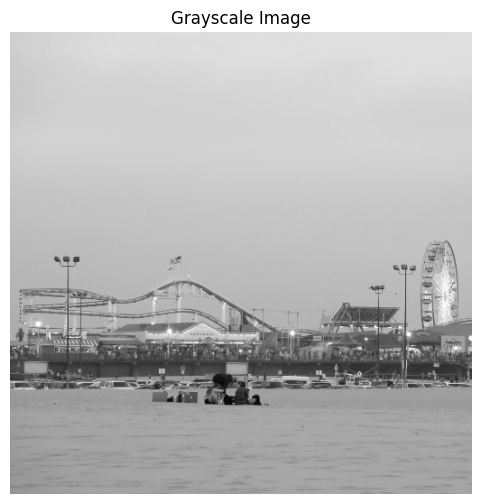

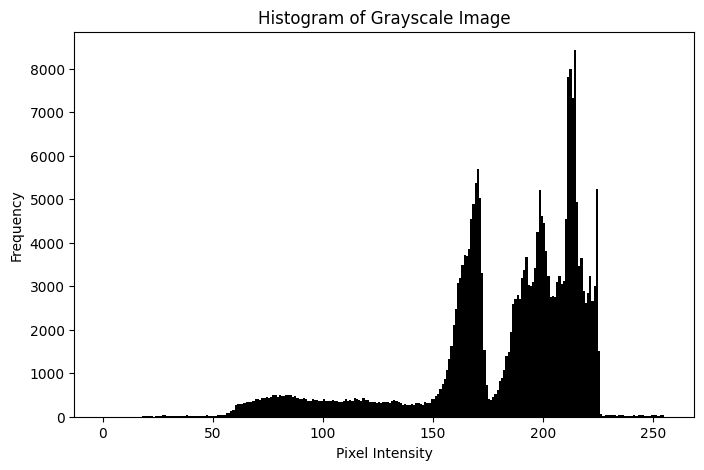

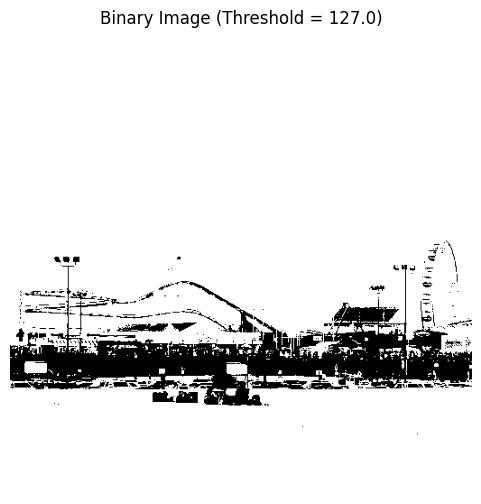

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (Make sure beach.jpg is uploaded to Colab)
from google.colab import files
uploaded = files.upload()  # Upload the image manually

# Read the image
image = cv2.imread('beach.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Hide axes
plt.show()

# Compute and display the histogram
plt.figure(figsize=(8,5))
plt.hist(gray.ravel(), bins=256, range=[0,256], color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Choose a threshold (e.g., Otsu’s method for automatic thresholding)
threshold_value, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Display the binary image
plt.figure(figsize=(6,6))
plt.imshow(binary_image, cmap='gray')
plt.title(f'Binary Image (Threshold = {threshold_value})')
plt.axis('off')  # Hide axes
plt.show()



#**Question 2**

Saving haze.png to haze (1).png


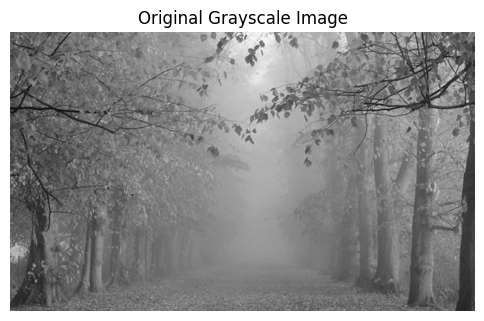

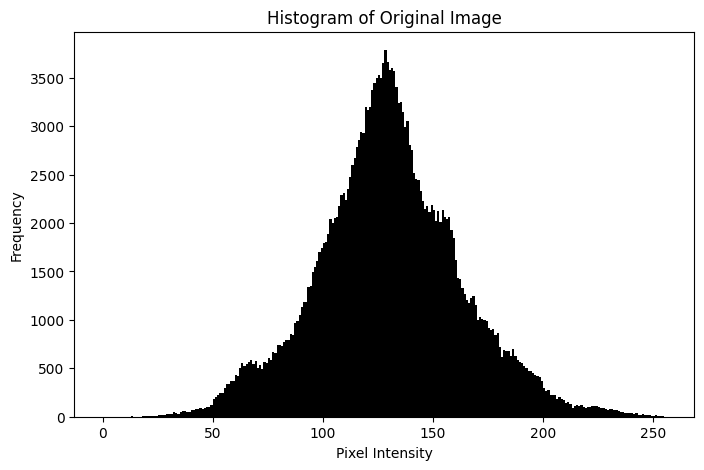

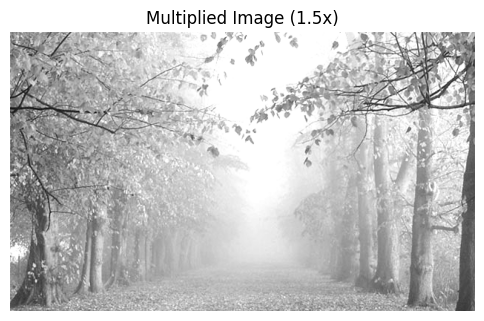

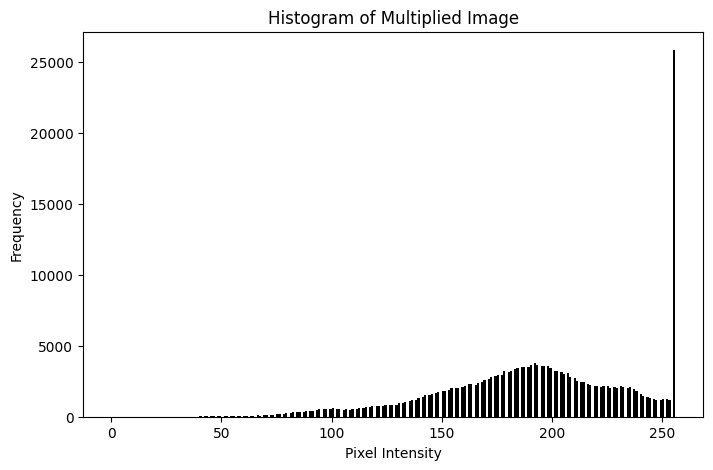

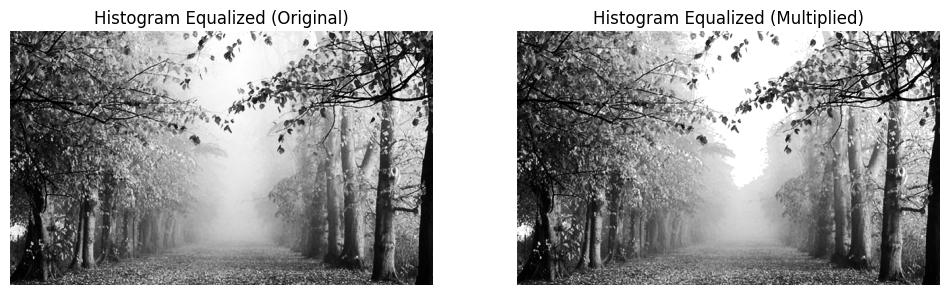

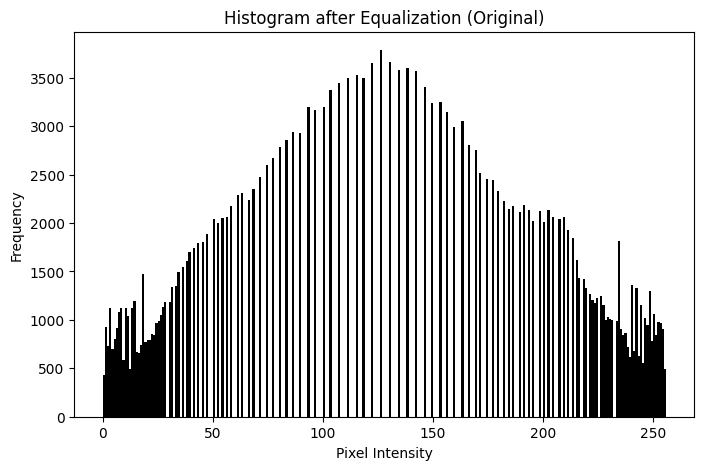

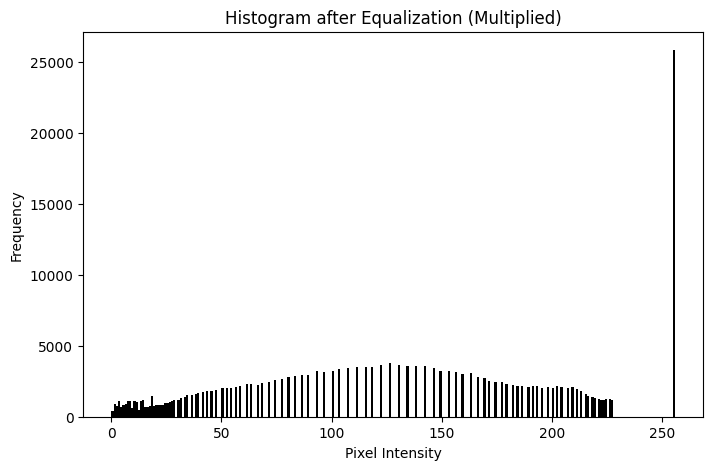

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()

# Load the image and convert it to grayscale
image = cv2.imread('haze.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to plot histogram
def plot_histogram(image, title):
    plt.figure(figsize=(8,5))
    plt.hist(image.ravel(), bins=256, range=[0,256], color='black')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Display the grayscale image
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

# Display histogram of the original image
plot_histogram(gray, 'Histogram of Original Image')

# Multiply the image by a positive real number (e.g., 1.5)
multiplied_image = np.clip(gray * 1.5, 0, 255).astype(np.uint8)

# Display multiplied image
plt.figure(figsize=(6,6))
plt.imshow(multiplied_image, cmap='gray')
plt.title('Multiplied Image (1.5x)')
plt.axis('off')
plt.show()

# Display histogram of multiplied image
plot_histogram(multiplied_image, 'Histogram of Multiplied Image')

# Perform Histogram Equalization
equalized_original = cv2.equalizeHist(gray)
equalized_multiplied = cv2.equalizeHist(multiplied_image)

# Display the equalized images
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(equalized_original, cmap='gray')
plt.title('Histogram Equalized (Original)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalized_multiplied, cmap='gray')
plt.title('Histogram Equalized (Multiplied)')
plt.axis('off')

plt.show()

# Display histograms after equalization
plot_histogram(equalized_original, 'Histogram after Equalization (Original)')
plot_histogram(equalized_multiplied, 'Histogram after Equalization (Multiplied)')


#**Question 3**

Saving fruits.jpg to fruits (2).jpg


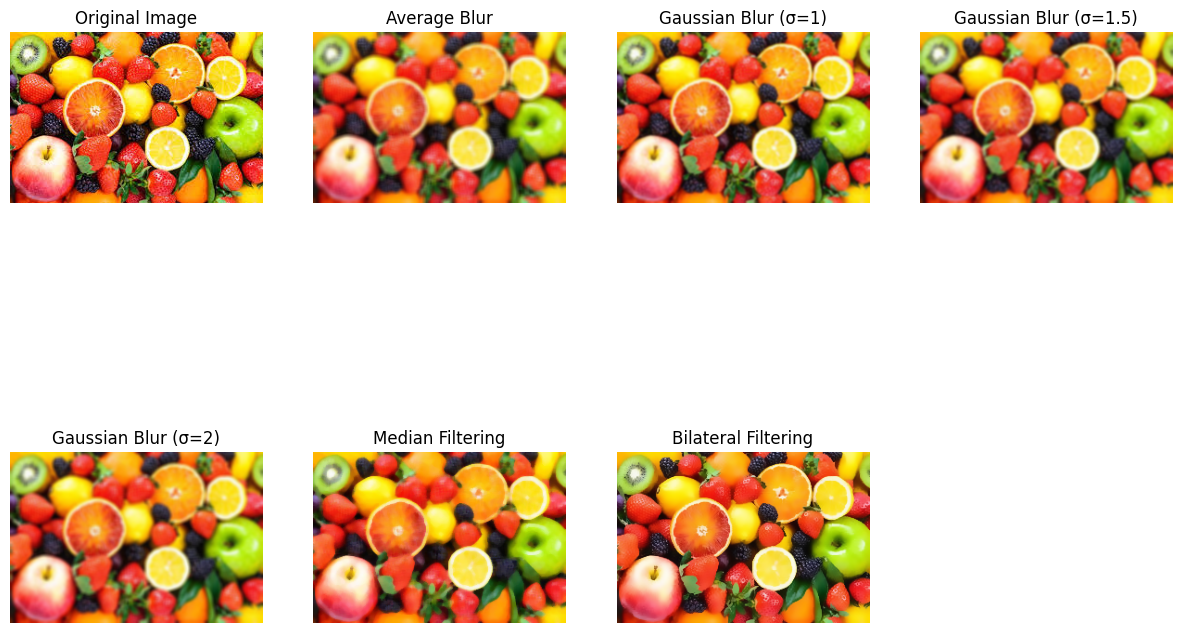

In [ ]:
import cv2
imporimport numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()

# Load the image
image = cv2.imread('fruits.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

# Function to display images
def show_images(images, titles, figsize=(15, 10)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Apply different smoothing filters
average_blur = cv2.blur(image, (5,5))  # Simple Average Blurring
gaussian_blur_1 = cv2.GaussianBlur(image, (5,5), 1)  # Gaussian Blur (sigma=1)
gaussian_blur_1_5 = cv2.GaussianBlur(image, (5,5), 1.5)  # Gaussian Blur (sigma=1.5)
gaussian_blur_2 = cv2.GaussianBlur(image, (5,5), 2)  # Gaussian Blur (sigma=2)
median_blur = cv2.medianBlur(image, 5)  # Median Filtering
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)  # Bilateral Filtering

# Display results
show_images(
    [image, average_blur, gaussian_blur_1, gaussian_blur_1_5, gaussian_blur_2, median_blur, bilateral_filter],
    ['Original Image', 'Average Blur', 'Gaussian Blur (σ=1)', 'Gaussian Blur (σ=1.5)', 'Gaussian Blur (σ=2)', 'Median Filtering', 'Bilateral Filtering']
)


#**Question 4**

Saving house.jpg to house (2).jpg


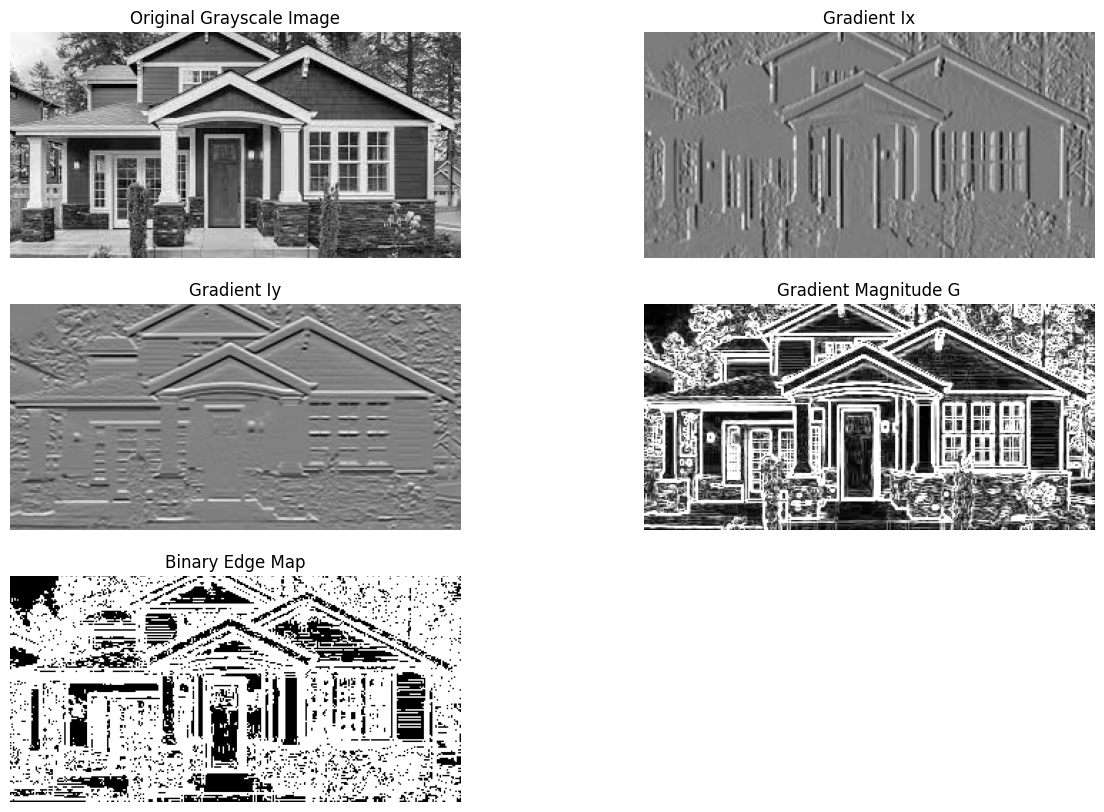

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()

# Load the image and convert it to grayscale
image = cv2.imread('house.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute Sobel gradients
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

# Compute gradient magnitude
G = np.sqrt(Ix**2 + Iy**2)
G = cv2.convertScaleAbs(G)  # Convert to 8-bit format

# Perform thresholding on G to get binary edge map
threshold_value = 50  # Adjust based on image contrast
_, binary_edge_map = cv2.threshold(G, threshold_value, 255, cv2.THRESH_BINARY)

# Function to display images
def show_images(images, titles, figsize=(15, 10)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(3, 2, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Display all results
show_images(
    [gray, Ix, Iy, G, binary_edge_map],
    ['Original Grayscale Image', 'Gradient Ix', 'Gradient Iy', 'Gradient Magnitude G', 'Binary Edge Map']
)
